<a href="https://colab.research.google.com/github/gargantualpunisher/Evaluation-projects/blob/main/sgd_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [9]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [21]:
import random


In [66]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]


    vdw = np.zeros(shape=(number_of_features))
    vdb = 0
    momentum = 0.8

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        # Update momentum terms
        vdw = momentum * vdw + (1 - momentum) * w_grad
        vdb = momentum * vdb + (1 - momentum) * b_grad


        w = w - learning_rate * vdw
        b = b - learning_rate * vdb

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list


In [67]:

w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000)


In [68]:
np.min(cost)

8.573290223054589e-05

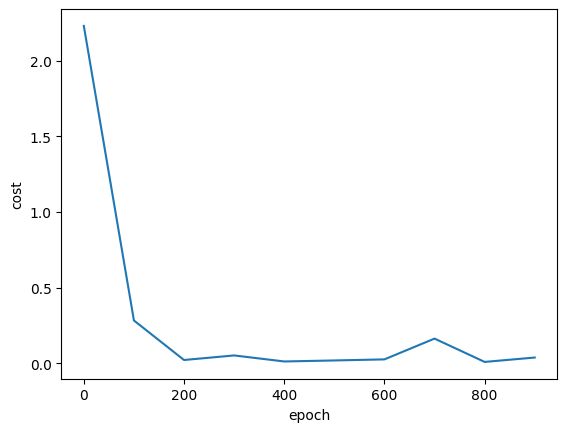

In [69]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [70]:
def stochastic_gradient_descents(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost1, cost_list1, epoch_list1 = stochastic_gradient_descents(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000)



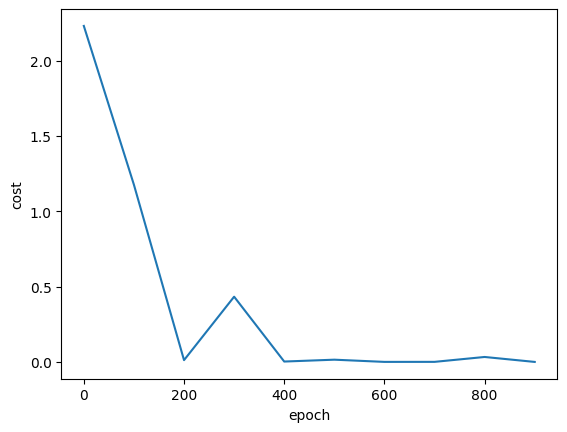

In [72]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list1,cost_list1)

In [73]:
np.min(cost)

8.573290223054589e-05

In [74]:
np.min(cost1)

0.027351591195702556